Figure 3A: EMI Impulse Responses

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from ctrl.discrete_optimal_control2 import LQR
from ctrl import utils
import numpy as np
import custom_rcparams_paper as crc

data = utils.load_data(3)    
# data = [data[i] for i in range(len(data)) if (i!=1 and i!=4)]
features = data[0]['Xlabs']
intervs = data[0]['Ilabs']
ac = np.zeros((len(data), len(features)))
mc = np.zeros((len(data), len(features)))
emi_IR = np.zeros((len(data), len(intervs), len(features)))

for j in range(len(data)):
    X = data[j]['X']
    A = data[j]['A']
    B = data[j]['C']
    ac[j] = LQR.average_ctrb(A, 15)    
    mc[j] = LQR.modal_ctrb(A)    
    for i in range(len(intervs)):
        emi_IR[j,i] = LQR.impulse_response(A, B[:,i], 100)
        # emi_IR[j,i] /= np.max(emi_IR[j,i])
        # emi_IR[j,i] = np.nan_to_num(emi_IR[j,i], nan=0)

with mpl.rc_context({'ytick.labelsize':'small', 'figure.constrained_layout.wspace':0.05}):
    fig, axes = plt.subplots(1,len(intervs), figsize=(6.27,2), sharey=True)
    xlims = [(-5,5), (-5,5), (-10,10), (-5,5)]
    for i, ax in enumerate(axes):
        for j in range(len(features)):
            ax.barh(j, np.median(emi_IR[:,i,j], axis=0), 
                    xerr=np.expand_dims([np.median(emi_IR[:,i,j], axis=0) - np.percentile(emi_IR[:,i,j], 25, axis=0), 
                                         np.percentile(emi_IR[:,i,j], 75, axis=0) - np.median(emi_IR[:,i,j], axis=0)], 1),
                    color=crc.colors.features[j], ecolor=crc.colors.errorbars)
            ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
        ax.set_xlabel('IR')
        # ax.set_xlabel('norm. IR')
        xlim = np.max(np.abs(ax.get_xlim()))
        ax.set_xlim((-xlim, xlim))
        ax.set_yticks(np.arange(len(features)))
        ax.set_yticklabels(features)
        ax.set_ylim((-0.7, len(features)-0.3))
        ax.set_title(intervs[i])
        if i>0:
            ax.spines[['left']].set_visible(False)
            ax.tick_params('y',left=False)
        if i<len(intervs)-1:
            ax.spines[['right']].set_visible(False)
        
    plt.savefig('figures/paper/figure3A.png')
    plt.savefig('figures/paper/figure3A.svg')

print('Bonferroni corrected T Test results')
ttest = stats.ttest_1samp(np.median(emi_IR[:,0], axis=0), 0)
print(f'EMI-I: T={ttest.statistic}, p={ttest.pvalue*16}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(emi_IR[:,1], axis=0), 0)
print(f'EMI-II: T={ttest.statistic}, p={ttest.pvalue*7}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(emi_IR[:,2], axis=0), 0)
print(f'EMI-III: T={ttest.statistic}, p={ttest.pvalue*16}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(emi_IR[:,3], axis=0), 0)
print(f'With company: T={ttest.statistic}, p={ttest.pvalue*7}, df={ttest.df}')

d:\ZI Mannheim\Control Theory\project_EMIcompass\.venv\lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Bonferroni corrected T Test results
EMI-I: T=-4.1498946544282935, p=0.015708293507751547, df=14
EMI-II: T=-6.552425486108697, p=9.001227772905607e-05, df=14
EMI-III: T=-1.9957405101597911, p=1.052747299918029, df=14
With company: T=-1.5786453318854334, p=0.9571780085576831, df=14


Figure 4B: Max Median AC Impulse Response

Figure 4C: Max Individual AC Impulse Response

Figure 4D: Max Median MC Impulse Response

d:\ZI Mannheim\Control Theory\project_EMIcompass\.venv\lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


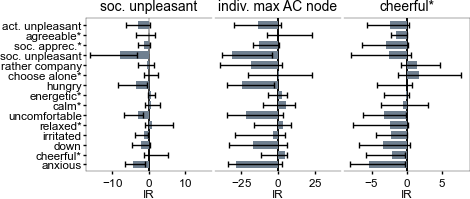

In [3]:
import matplotlib.pyplot as plt
from ctrl.discrete_optimal_control2 import LQR
from ctrl import utils
import numpy as np
import custom_rcparams_paper as crc

data = utils.load_data(3)    
features = data[0]['Xlabs']
intervs = data[0]['Ilabs']
ac = np.zeros((len(data), len(features)))
mc = np.zeros((len(data), len(features)))
node_IR = np.zeros((len(data), len(features), len(features)))
individual_highest_AC_node_IR = np.zeros((len(data), len(features)))

for j in range(len(data)):
    X = data[j]['X']
    A = data[j]['A']
    B = np.eye(A.shape[0])
    ac[j] = LQR.average_ctrb(A, 15)    
    mc[j] = LQR.modal_ctrb(A)    
    for i in range(len(features)):
        node_IR[j,i] = LQR.impulse_response(A, -B[:,i], 100)

highest_median_ac = 11 #SOC. UNPLEASANT #np.argmax(np.median(ac, axis=0))
highest_median_mc = 1 #CHEERFUL #np.argmax(np.median(mc, axis=0))
highest_individual_ac = np.argmax(ac, axis=1)
for i in range(len(data)):
    individual_highest_AC_node_IR[i] = node_IR[i, highest_individual_ac[i]]

fig, axes = plt.subplots(1,3, figsize=(4.7,2), sharey=True)

ax = axes[0]
for j in range(len(features)):
    ax.barh(j, np.median(node_IR[:,highest_median_ac,j], axis=0), 
        xerr=np.expand_dims([np.median(node_IR[:,highest_median_ac,j], axis=0) - np.percentile(node_IR[:,highest_median_ac,j], 25, axis=0), 
                np.percentile(node_IR[:,highest_median_ac,j], 75, axis=0) - np.median(node_IR[:,highest_median_ac,j], axis=0)], 1),
        color=crc.colors.features[j], ecolor=crc.colors.errorbars)
    ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
ax.set_xlabel('IR')
xlim = np.max(np.abs(ax.get_xlim()))
ax.set_xlim((-xlim, xlim))
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_ylim((-0.7, len(features)-0.3))
ax.set_title(features[highest_median_ac])
ax.spines[['right']].set_visible(False)

ax = axes[1]
for j in range(len(features)):
    median = np.median(individual_highest_AC_node_IR[:,j], axis=0)
    percentile25 = np.percentile(individual_highest_AC_node_IR[:,j], 25, axis=0)
    percentile75 = np.percentile(individual_highest_AC_node_IR[:,j], 75, axis=0)
    ax.barh(j, median, 
        #     xerr = [median - percentile25, percentile75 - median],
            xerr=np.expand_dims([median - percentile25, percentile75 - median], 1),
            color=crc.colors.features[j], ecolor=crc.colors.errorbars)
    ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
ax.set_xlabel('IR')
xlim = np.max(np.abs(ax.get_xlim()))
ax.set_xlim((-xlim, xlim))
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_ylim((-0.7, len(features)-0.3))
ax.set_title('indiv. max AC node')
ax.spines[['left']].set_visible(False)
ax.tick_params('y',left=False)
ax.spines[['right']].set_visible(False)

ax = axes[2]
for j in range(len(features)):
    ax.barh(j, np.median(node_IR[:,highest_median_mc,j], axis=0), 
        xerr=np.expand_dims([np.median(node_IR[:,highest_median_mc,j], axis=0) - np.percentile(node_IR[:,highest_median_mc,j], 25, axis=0), 
                np.percentile(node_IR[:,highest_median_mc,j], 75, axis=0) - np.median(node_IR[:,highest_median_mc,j], axis=0)], 1),
        color=crc.colors.features[j], ecolor=crc.colors.errorbars)
    ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
ax.set_xlabel('IR')
xlim = np.max(np.abs(ax.get_xlim()))
ax.set_xlim((-xlim, xlim))
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_ylim((-0.7, len(features)-0.3))
ax.set_title(features[highest_median_mc])
ax.spines[['left']].set_visible(False)
ax.tick_params('y',left=False)

plt.savefig('figures/paper/figure3B-D.png')
plt.savefig('figures/paper/figure3B-D.svg')
plt.show()